In [197]:
import pandas as pd

input_file = "dataProcessed/2023MIL.txt"
df = pd.read_csv(input_file, skiprows=10, delim_whitespace=True)
print(df.head())


  Number        yyyy        mm      dd      hh  mi  ssf   f  f.1
0     1)  2023/01/01  00:00:00  1.367M  0.409M NaN  NaN NaN  NaN
1     2)  2023/01/01  00:15:00   1.289   0.420 NaN  NaN NaN  NaN
2     3)  2023/01/01  00:30:00   1.225   0.423 NaN  NaN NaN  NaN
3     4)  2023/01/01  00:45:00   1.187   0.430 NaN  NaN NaN  NaN
4     5)  2023/01/01  01:00:00   1.168   0.431 NaN  NaN NaN  NaN


/var/folders/mm/h47z2s357dq24sj3f9lbwsqc0000gn/T/ipykernel_75455/1957862928.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(input_file, skiprows=10, delim_whitespace=True)


In [5]:
import pandas as pd

input_file = "dataProcessed/BOu3Y11.csv" 
output_file = "dataProcessed/BOU2019.csv"

df = pd.read_csv(input_file)
date_column = 'time'
filtered_df = df[df[date_column].str.contains("2019", na=False)]
filtered_df.to_csv(output_file, index=False)

In [198]:
df['time'] = pd.to_datetime(df['yyyy'] + ' ' + df['mm'], format='%Y/%m/%d %H:%M:%S')

df.rename(columns={'dd': 'Water_Level_LAT'}, inplace=True)

df = df[['time', 'Water_Level_LAT']]
print(df.head())

                 time Water_Level_LAT
0 2023-01-01 00:00:00          1.367M
1 2023-01-01 00:15:00           1.289
2 2023-01-01 00:30:00           1.225
3 2023-01-01 00:45:00           1.187
4 2023-01-01 01:00:00           1.168


In [199]:
print(df.head(100))

                  time Water_Level_LAT
0  2023-01-01 00:00:00          1.367M
1  2023-01-01 00:15:00           1.289
2  2023-01-01 00:30:00           1.225
3  2023-01-01 00:45:00           1.187
4  2023-01-01 01:00:00           1.168
..                 ...             ...
95 2023-01-01 23:45:00           1.864
96 2023-01-02 00:00:00           1.714
97 2023-01-02 00:15:00           1.572
98 2023-01-02 00:30:00           1.439
99 2023-01-02 00:45:00           1.317

[100 rows x 2 columns]


In [6]:
file_path = "dataProcessed/MIL2023.csv"

df.to_csv(file_path, index=False)

In [4]:
import pandas as pd


file_path = "dataProcessed/MIL2023.csv"  
df = pd.read_csv(file_path)
import pandas as pd
df['anomaly_cleaned'] = df['Water_Level_LAT'].apply(lambda x: ''.join(c for c in str(x) if c.isdigit() or c == '.'))
df['anomaly_cleaned'] = pd.to_numeric(df['anomaly_cleaned'], errors='coerce')
df.drop(columns=['Water_Level_LAT'], inplace=True)
df.rename(columns={'anomaly_cleaned': 'Water_Level_LAT'}, inplace=True)
output_file = "dataProcessed/MIL20231.csv"
df.to_csv(output_file, index=False)

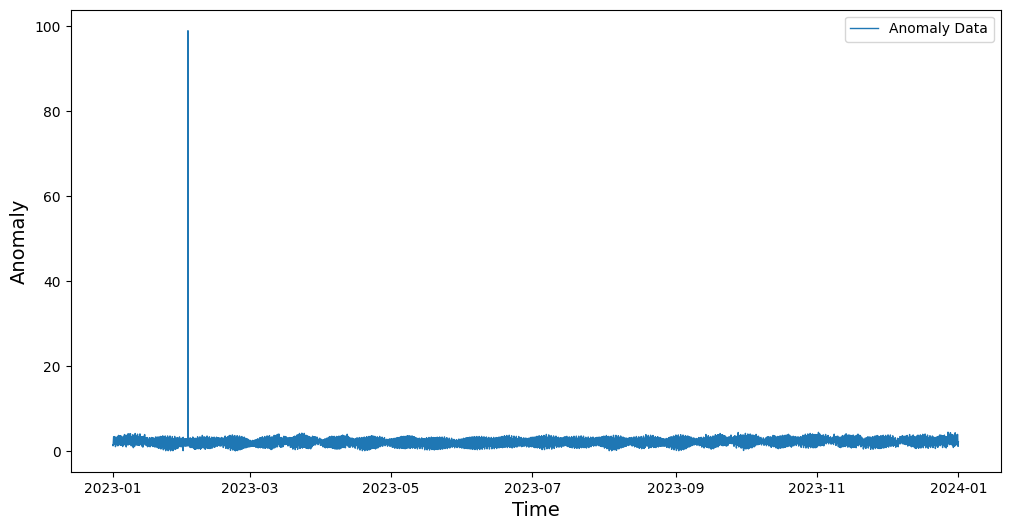

In [3]:
import matplotlib.pyplot as plt


input_file = "dataProcessed/MIL20231.csv" 

df = pd.read_csv(input_file)

df['time'] = pd.to_datetime(df['time'])

plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['Water_Level_LAT'], label='Anomaly Data', linewidth=1)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Anomaly', fontsize=14)
plt.legend()
plt.show()

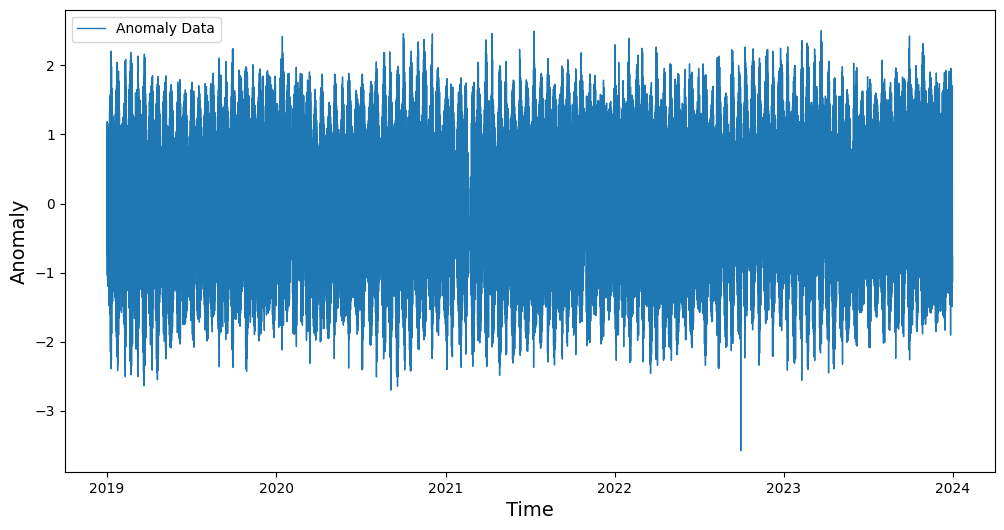

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
input_file = "dataProcessed/ABE5Y1_HA_processed.csv"  

df = pd.read_csv(input_file)

df['time'] = pd.to_datetime(df['time'])

plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['anomaly'], label='Anomaly Data', linewidth=1)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Anomaly', fontsize=14)
plt.legend()
plt.show()